In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats

[[ 0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  1  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  1  2  0  1  0  0  0]
 [ 0  0  1  0  0  7  2  0  1  0  0]
 [ 0  0  1  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  3  0  1  0  0  0]
 [ 0  0  0  3  3  1  3  1  5  0  2]
 [ 0  0  0  1  0  0  5  2  6  5  3]
 [ 0  0  0  1  2  1  1  0 13 11  5]]


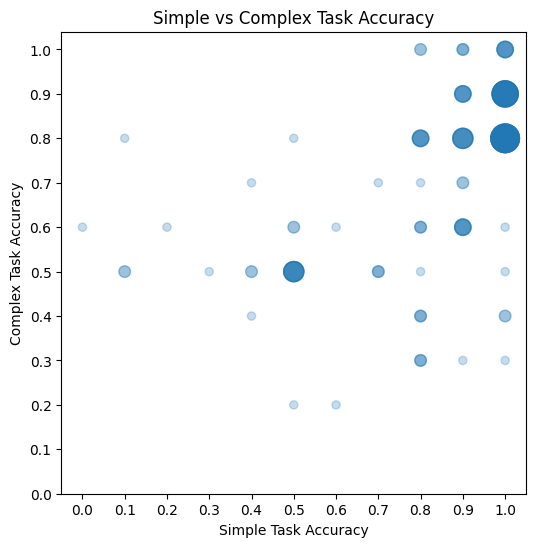

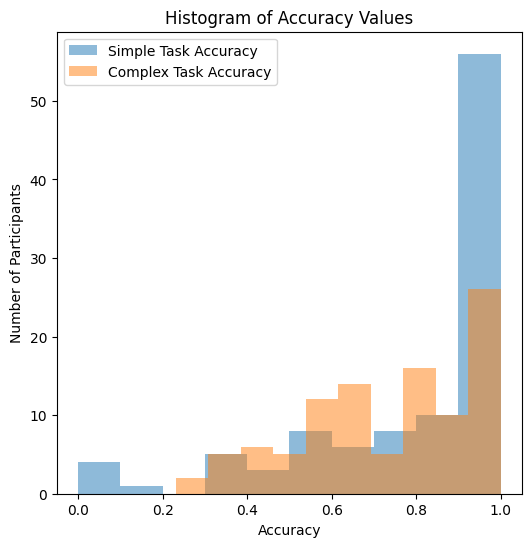

In [4]:
df = pd.read_csv('data/final_datasets/final_experiment_participants_extended.csv')
plt.figure(figsize=(6, 6))
x = df['AnswerAccuracySimple']
x_rounded = [round(i, 1) for i in x]
y = df['AnswerAccuracyComplex']
y_rounded = [round(i, 1) for i in y]
# move the counts to the closest value with 1 digit after the comma for sx
s_rounded = np.array(11*[np.array(11*[0])])
for cur_x, cur_y in zip(x_rounded, y_rounded):
    s_rounded[int(cur_x*10)][int(cur_y*10)] += 1

s = np.zeros(len(x))

print(s_rounded)
# plot s_rounded as a scatter plot with increasing size of the dots based on the number of participants per accuracy value
for i in range(len(x)):
    s[i] = max(s_rounded[int(x_rounded[i]*10)][int(y_rounded[i]*10)]//2, 0.5)*70
# scatter plot with increasing size of the dots based on the number of participants per accuracy value
plt.scatter(x_rounded, y_rounded, s=s, alpha=0.25)
plt.xlabel('Simple Task Accuracy')
plt.ylabel('Complex Task Accuracy')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Simple vs Complex Task Accuracy')
plt.show()

# plot histogram of the accuracy values for the simple and complex tasks
plt.figure(figsize=(6, 6))
plt.hist(x, bins=10, alpha=0.5, label='Simple Task Accuracy')
plt.hist(y, bins=10, alpha=0.5, label='Complex Task Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Number of Participants')
plt.title('Histogram of Accuracy Values')
plt.legend()
plt.show()

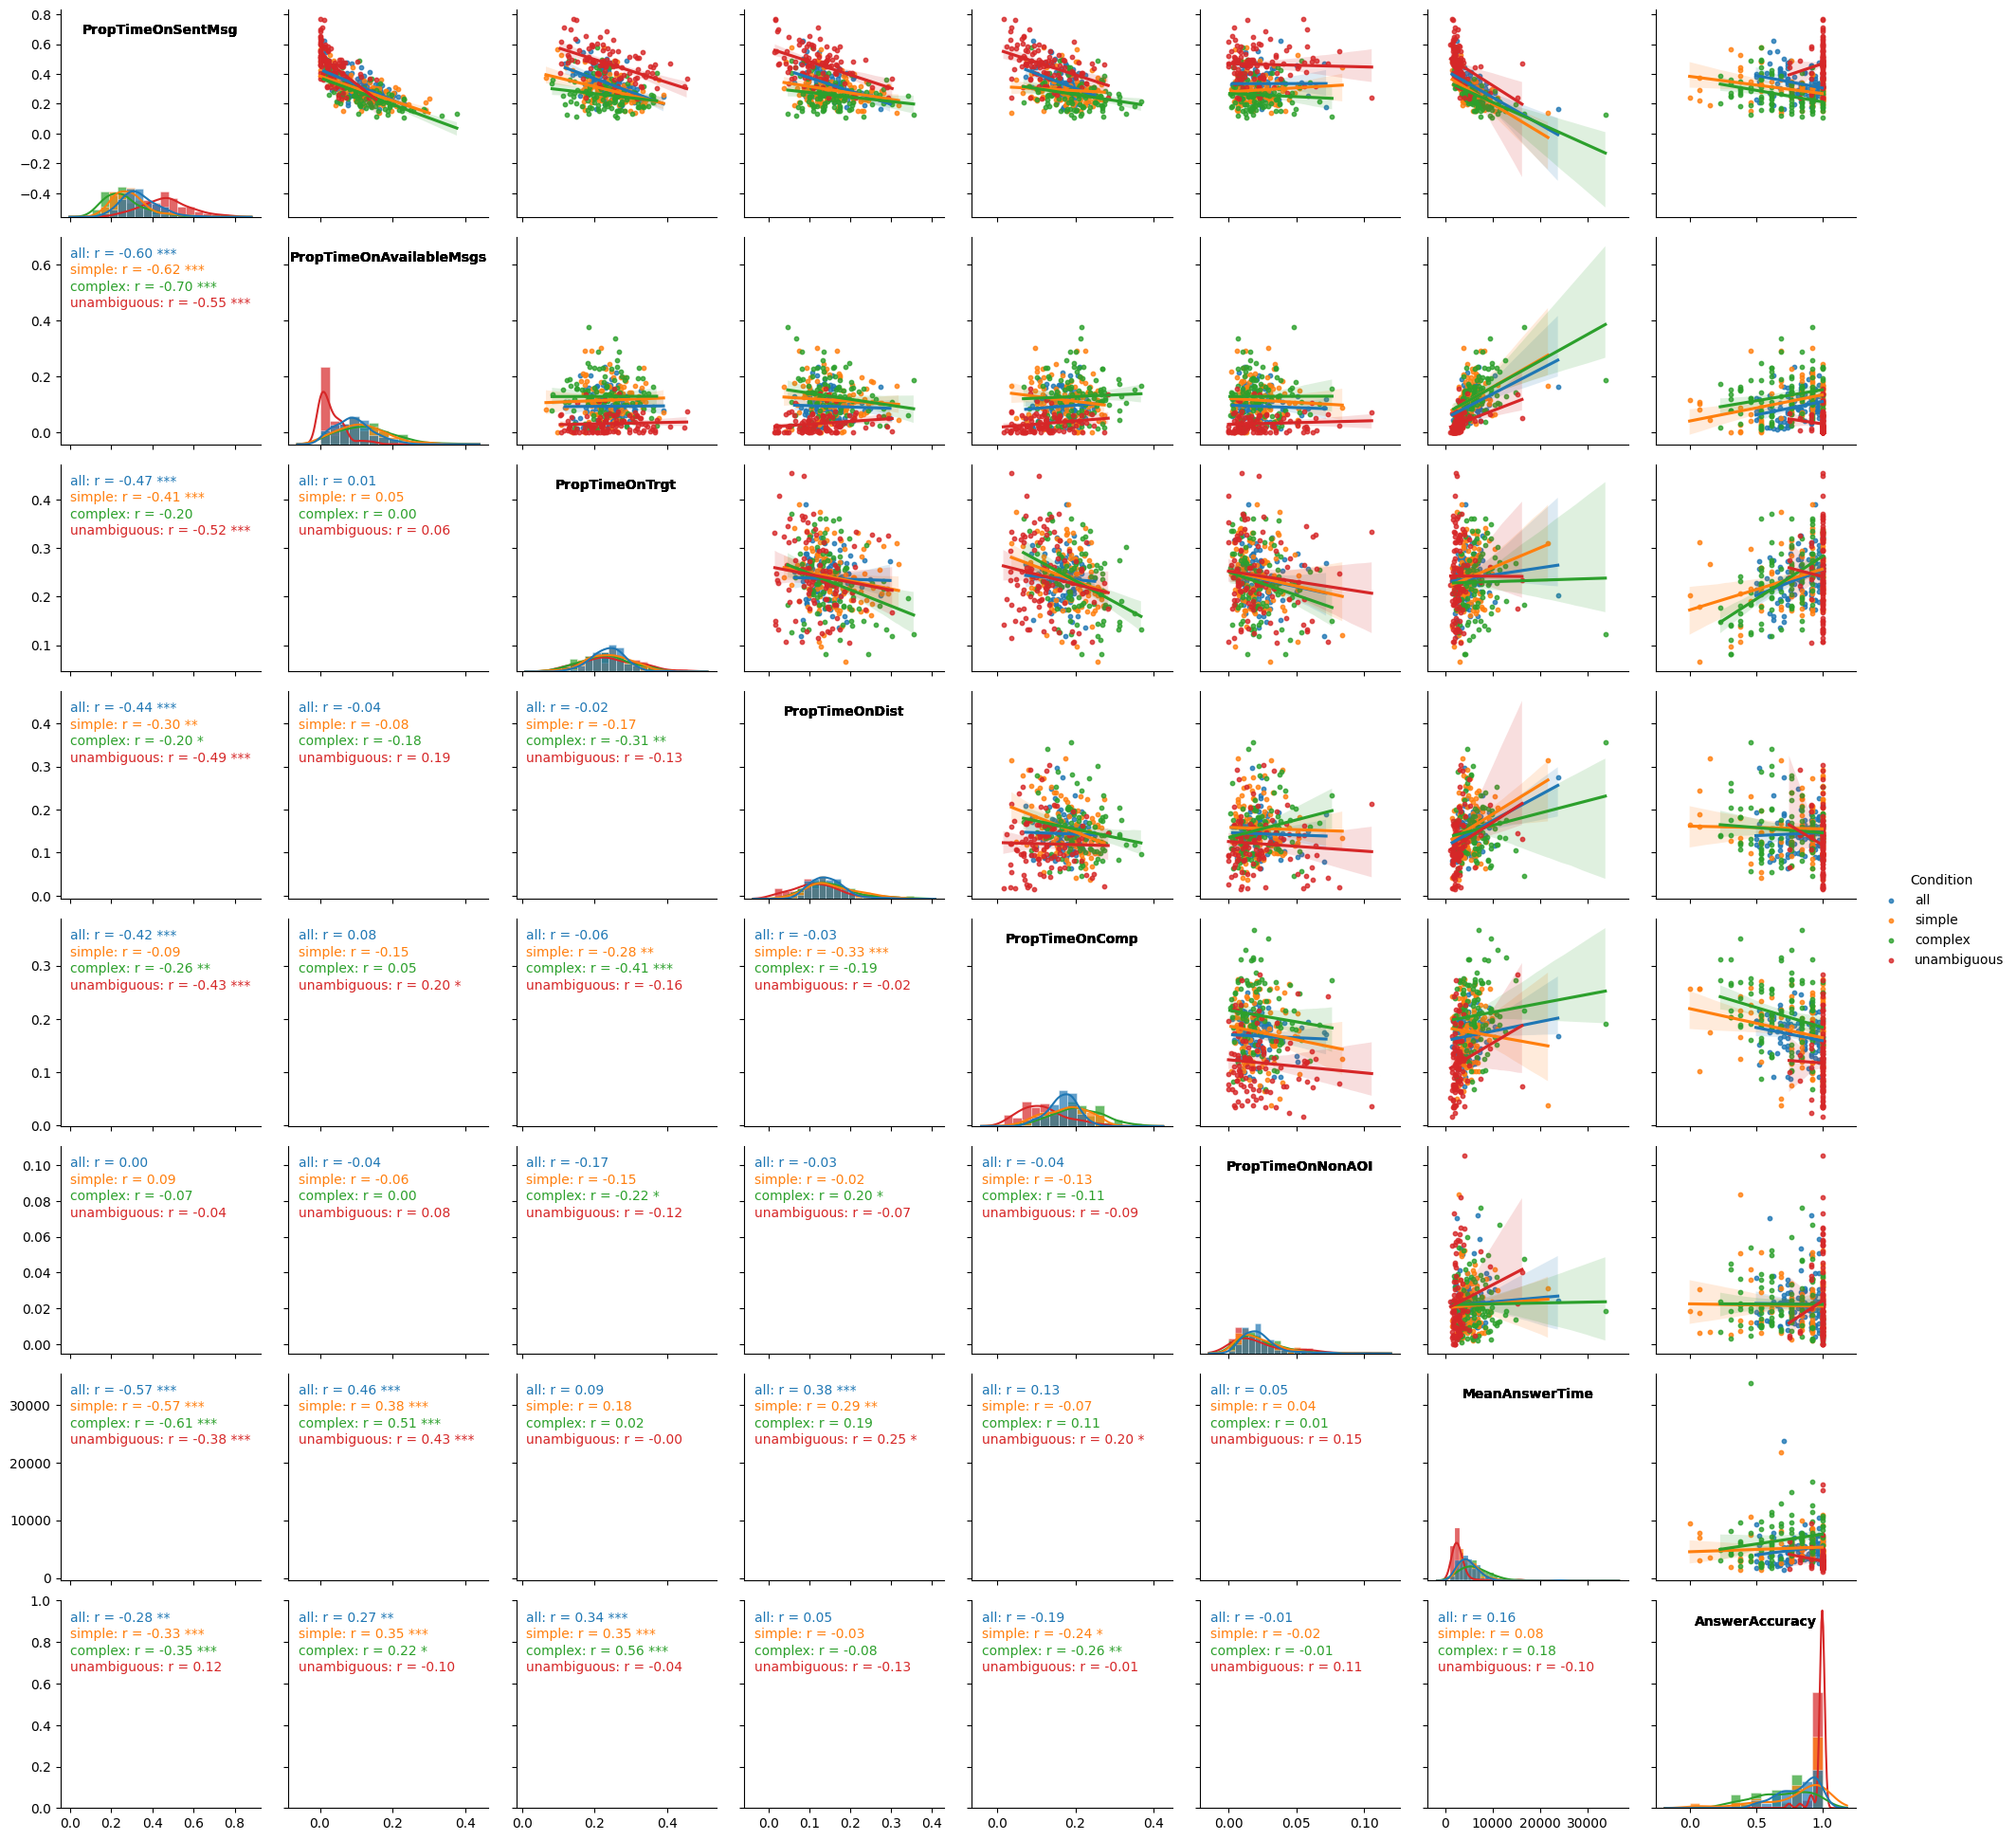

In [3]:
df = pd.read_csv('data/final_datasets/final_experiment_participants.csv')
df.drop("Subject", inplace=True, axis=1)

def corrfunc(x, y, hue_value=None, color=None, ax=None, y_offset=0, **kws):
    """Annotate the plot with the correlation coefficient and significance."""
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    if ax is None:
        ax = plt.gca()
    label = f'{hue_value}: r = {r:.2f} {p_stars}' if hue_value else f'r = {r:.2f} {p_stars}'
    ax.annotate(label, xy=(0.05, 0.9 - y_offset), xycoords='axes fraction', color=color, fontsize=10, alpha=1)

def annotate_colname(x, **kws):
    """Annotate the diagonal with the column name."""
    ax = plt.gca()
    ax.annotate(x.name, xy=(0.5, 0.9), xycoords='axes fraction',
                ha='center', va='center', fontweight='bold')

def cor_matrix(df, hue=None):
    """Create a correlation matrix plot with optional hue."""
    if hue:
        unique_hues = df[hue].unique()
        palette = sns.color_palette(n_colors=len(unique_hues))
        hue_colors = dict(zip(unique_hues, palette))
        
        g = sns.PairGrid(df, hue=hue, palette=palette)
        g.map_upper(sns.regplot, scatter_kws={'s': 10})
        g.map_diag(sns.histplot, kde=True, kde_kws=dict(cut=3), alpha=.7, edgecolor=(1, 1, 1, .4))
        g.map_diag(annotate_colname)
        
        # Custom lower triangle with correlation per hue
        for i, j in zip(*np.tril_indices_from(g.axes, -1)):
            ax = g.axes[i, j]
            for idx, hue_value in enumerate(unique_hues):
                subset = df[df[hue] == hue_value]
                x_col = g.x_vars[j]  # Get the column name for x-axis
                y_col = g.y_vars[i]  # Get the column name for y-axis
                corrfunc(subset[x_col], subset[y_col], hue_value=hue_value, color=hue_colors[hue_value], ax=ax, y_offset=idx * 0.08)
        g.add_legend()
    else:
        g = sns.PairGrid(df)
        g.map_upper(sns.regplot, scatter_kws={'s': 10})
        g.map_diag(sns.histplot, kde=True, kde_kws=dict(cut=3), alpha=.7, edgecolor=(1, 1, 1, .4))
        g.map_diag(annotate_colname)
        g.map_lower(sns.kdeplot, cmap='Blues_d')
        g.map_lower(corrfunc)
    
    # Remove axis labels, as they're in the diagonals.
    for ax in g.axes.flatten():
        ax.set_ylabel('')
        ax.set_xlabel('')
    return g

cor_matrix(df, hue = 'Condition')
# pair_corr = sns.pairplot(df, hue='Condition')
# pair_corr.map_upper(corrfunc)

['all' 'simple' 'complex' 'unambiguous']


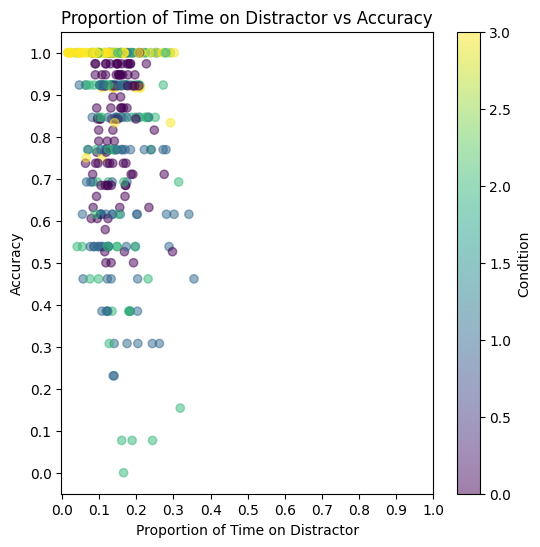

In [ ]:
df = pd.read_csv('data/final_datasets/final_experiment_participants.csv')
plt.figure(figsize=(6, 6))
# print(df['Condition'].unique())
x = df['PropTimeOnDist']
y = df['AnswerAccuracy']
# make a scatter plot of x and y changing hue depending on the condition
plt.scatter(x, y, c=df['Condition'].astype('category').cat.codes, cmap='viridis', alpha=0.5, )
plt.xlabel('Proportion of Time on Distractor')
plt.ylabel('Accuracy')
plt.title('Proportion of Time on Distractor vs Accuracy')
plt.colorbar(label='Condition')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()


In [5]:
df = pd.read_csv('data/final_datasets/final_experiment_trials.csv')
# df = df[df['Condition'] == 'unambiguous']
df = df[df['Correct'] == 1]
print(df['PropTimeOnAvailableMsgs'].mean())

0.09095096523314418


In [4]:
conditions = ['simple', 'complex', 'unambiguous']
rows = ['PropTimeOnSentMsg', 'PropTimeOnTrgt', 'PropTimeOnComp', 'PropTimeOnDist', 'PropTimeOnAvailableMsgs', 'PropTimeOnNonAOI']

def stars(p):
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    return p_stars


for condition in conditions:
    df = pd.read_csv('data/final_datasets/final_experiment_participants.csv')
    df = df[df['Condition'] == condition]
    df.drop(['Subject', 'Condition'], inplace=True, axis=1)
    corr_df = pd.DataFrame()
    corr_df['Mean'] = df.mean(axis=0).transpose().round(2)
    corr_df['SD'] = df.std(axis=0).transpose().round(2)
    corr_df['Accuracy'] = df.apply(lambda x: stats.pearsonr(x, df['AnswerAccuracy'])[0], axis=0).round(2)
    corr_df['Accuracy_p'] = df.apply(lambda x: stats.pearsonr(x, df['AnswerAccuracy'])[1], axis=0)
    corr_df['Accuracy_p_stars'] = corr_df['Accuracy_p'].apply(stars)
    corr_df['MeanAnswerTime'] = df.apply(lambda x: stats.pearsonr(x, df['MeanAnswerTime'])[0], axis=0).round(2)
    corr_df['MeanAnswerTime_p'] = df.apply(lambda x: stats.pearsonr(x, df['MeanAnswerTime'])[1], axis=0)
    corr_df['MeanAnswerTime_p_stars'] = corr_df['MeanAnswerTime_p'].apply(stars)
    corr_df.rename_axis('Feature', inplace=True)
    corr_df.to_csv(f'data/final_datasets/final_experiment_participants_corr_{condition}.csv')

In [15]:
df = pd.read_csv('data/final_datasets/final_experiment_participants.csv')



l0 = df[df['Label'] == 0]
l1 = df[df['Label'] == 1]
l2 = df[df['Label'] == 2]

# show the mean and std for each label for the accuracy, mean answer time and prop time features
cols = ['AnswerAccuracy', 'MeanAnswerTime', 'PropTimeOnSentMsg', 'PropTimeOnTrgt', 'PropTimeOnComp', 'PropTimeOnDist', 'PropTimeOnAvailableMsgs', 'PropTimeOnNonAOI']
conditions = ['simple', 'complex', 'unambiguous']
for condition in conditions:
    for col in cols:
        l0_mean = l0[l0['Condition'] == condition][col].mean()
        l0_std = l0[l0['Condition'] == condition][col].std()
        l1_mean = l1[l1['Condition'] == condition][col].mean()
        l1_std = l1[l1['Condition'] == condition][col].std()
        l2_mean = l2[l2['Condition'] == condition][col].mean()
        l2_std = l2[l2['Condition'] == condition][col].std()
        print(f'{condition} {col} {l0_mean:.2f} +/- {l0_std:.2f}, L1: {l1_mean:.2f} +/- {l1_std:.2f}, L2: {l2_mean:.2f} +/- {l2_std:.2f}')
    print()

simple AnswerAccuracy 0.47 +/- 0.25, L1: 0.87 +/- 0.14, L2: 0.92 +/- 0.11
simple MeanAnswerTime 4389.02 +/- 2478.63, L1: 4551.51 +/- 1725.10, L2: 5772.02 +/- 2768.77
simple PropTimeOnSentMsg 0.35 +/- 0.12, L1: 0.29 +/- 0.05, L2: 0.27 +/- 0.07
simple PropTimeOnTrgt 0.22 +/- 0.07, L1: 0.24 +/- 0.05, L2: 0.25 +/- 0.06
simple PropTimeOnComp 0.20 +/- 0.06, L1: 0.19 +/- 0.04, L2: 0.16 +/- 0.06
simple PropTimeOnDist 0.14 +/- 0.07, L1: 0.14 +/- 0.05, L2: 0.17 +/- 0.06
simple PropTimeOnAvailableMsgs 0.07 +/- 0.07, L1: 0.11 +/- 0.05, L2: 0.14 +/- 0.06
simple PropTimeOnNonAOI 0.02 +/- 0.01, L1: 0.02 +/- 0.02, L2: 0.02 +/- 0.01

complex AnswerAccuracy 0.56 +/- 0.16, L1: 0.57 +/- 0.19, L2: 0.81 +/- 0.18
complex MeanAnswerTime 4516.30 +/- 2255.99, L1: 5471.20 +/- 2420.20, L2: 7870.31 +/- 4592.46
complex PropTimeOnSentMsg 0.33 +/- 0.11, L1: 0.27 +/- 0.06, L2: 0.22 +/- 0.08
complex PropTimeOnTrgt 0.21 +/- 0.05, L1: 0.21 +/- 0.07, L2: 0.24 +/- 0.07
complex PropTimeOnComp 0.20 +/- 0.05, L1: 0.23 +/- 0.0